#Monthly comparison
Read in the good_seeds lists from each of the months that have been run

In [1]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly'))
import glob, pickle
ff = sorted(glob.glob('month*/plots/seedcheck/*.csv')); ff

['month01/plots/seedcheck/good_seeds.csv',
 'month08/plots/seedcheck/good_seeds.csv',
 'month09/plots/seedcheck/good_seeds.csv',
 'month10/plots/seedcheck/good_seeds.csv',
 'month11/plots/seedcheck/good_seeds.csv',
 'month13/plots/seedcheck/good_seeds.csv']

In [2]:
if False: # disable for now
    ff = sorted(glob.glob('month*/source*.pickle')); ff
    dd = [pickle.load(open(f)) for f in ff]
    keys = [set([n[:4] for n in d.index]) for d in dd]; keys

In [3]:
seedlists = [pd.read_csv(f, index_col=0) for f in ff]
bznames=[] 
for seedlist in seedlists:
    sel = (seedlist.aprob>0.8) & (seedlist.acat=='bzcat')
    bznames.append(np.array(seedlist[sel]['aname']))

In [4]:
sets = map(set, bznames)
# make a combined table of bzcat associations
a = sets[0]
for b in sets[1:]:
    a = a.union(b)
allnames = sorted(a); len(allnames) 

95

In [5]:
bb = dict()
for bzname in allnames:
    tss = [0]*len(seedlists)
    aprob = [0]*len(seedlists)
    for i,seedlist in enumerate(seedlists):
        if bzname not in list(seedlist.aname): continue
        j = list(seedlist.aname).index(bzname)
        tss[i] = round(seedlist.ts[j],1)
        aprob[i] = round(seedlist.aprob[j],2)
    bb[bzname] = dict(ts=tss, aprob=aprob)
df = pd.DataFrame(bb).T
df.index.name='bzcat_name'
df['tsmax'] = [max(ts) for ts in df.ts]
df['months']= [sum(np.array(ts)>0) for ts in df.ts]
df['type'] = [name[3] for name in df.index]
df

,aprob,ts,tsmax,months,type
bzcat_name,,,,,
5BZBJ0037+1238,"[0, 0.99, 0, 0, 0, 0]","[0, 17.7, 0, 0, 0, 0]",17.7,1,B
5BZBJ0100-0055,"[0, 0, 0.92, 0, 0, 0]","[0, 0, 14.7, 0, 0, 0]",14.7,1,B
5BZBJ0122+1510,"[0, 0, 0.9, 0, 0, 0]","[0, 0, 13.9, 0, 0, 0]",13.9,1,B
5BZBJ0334-3725,"[0, 0.71, 0.95, 0, 0.98, 0]","[0, 20.5, 62.3, 0, 20.0, 0]",62.3,3,B
5BZBJ0354+8009,"[0.82, 0, 0, 0, 0, 0]","[10.7, 0, 0, 0, 0, 0]",10.7,1,B
5BZBJ0612+4122,"[0, 0, 0, 0, 0, 1.0]","[0, 0, 0, 0, 0, 14.8]",14.8,1,B
5BZBJ0615-3117,"[0.9, 0, 0, 0, 0, 0]","[10.5, 0, 0, 0, 0, 0]",10.5,1,B
5BZBJ0710+4732,"[0.86, 0, 0, 0, 0, 0]","[11.6, 0, 0, 0, 0, 0]",11.6,1,B
5BZBJ0818+4222,"[0.92, 0, 0, 0, 0, 0]","[16.0, 0, 0, 0, 0, 0]",16.0,1,B


In [6]:
df[df.months>1]

,aprob,ts,tsmax,months,type
bzcat_name,,,,,
5BZBJ0334-3725,"[0, 0.71, 0.95, 0, 0.98, 0]","[0, 20.5, 62.3, 0, 20.0, 0]",62.3,3,B
5BZQJ1224+2122,"[0, 0, 0, 0.99, 0.99, 0]","[0, 0, 0, 39.5, 143.0, 0]",143.0,2,Q
5BZQJ1239+0443,"[0, 0.83, 0, 0, 0, 0.99]","[0, 33.0, 0, 0, 0, 150.4]",150.4,2,Q
5BZQJ1246-2547,"[0, 0, 0, 0.96, 0.99, 0]","[0, 0, 0, 37.7, 26.6, 0]",37.7,2,Q
5BZQJ1256-0547,"[0, 0, 1.0, 1.0, 0, 0]","[0, 0, 458.6, 367.5, 0, 0]",458.6,2,Q
5BZQJ1427-4206,"[0, 0, 1.0, 0.99, 0, 1.0]","[0, 0, 27.6, 65.0, 0, 74.3]",74.3,3,Q
5BZQJ2253+1608,"[0, 0.99, 1.0, 0, 0, 0]","[0, 96.0, 473.5, 0, 0, 0]",473.5,2,Q
5BZUJ1048+7143,"[0, 0.86, 0, 0, 0.96, 0]","[0, 27.6, 0, 0, 52.2, 0]",52.2,2,U


In [7]:
types = set(list(df.type))
tc = [sum(df.type==type) for type in types]
dict(zip(types, tc))

{'B': 31, 'G': 4, 'Q': 52, 'U': 8}

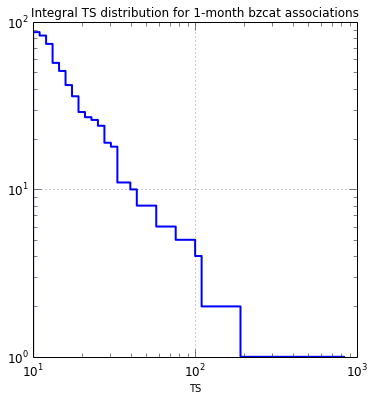

In [8]:
# make an integral logTS plot for 1-month guys
fig, ax = plt.subplots(figsize=(6,6))
tsmax=1000
ax.hist(df.tsmax[df.months==1], np.logspace(1,np.log10(tsmax),51),
       cumulative=-1, lw=2, color='b', histtype='step', log=True);
plt.setp(ax, xscale='log', xlabel='TS', ylim=(1,None), xlim=(10, tsmax),
        title='Integral TS distribution for 1-month bzcat associations')
ax.grid(True, alpha=0.8);

In [9]:
df.to_csv('summary.csv')

In [10]:
pwd

u'/nfs/farm/g/glast/g/catalog/pointlike/skymodels/P301_monthly'